# Ανάλυση Απόφασης Επένδυσης για το Γυμναστήριο FitFlex

## Επιχειρηματικό Σενάριο

Το "FitFlex" είναι ένα καθιερωμένο γυμναστήριο που αντιμετωπίζει αυξανόμενο ανταγωνισμό στην περιοχή του. Για να διατηρήσει το ανταγωνιστικό του πλεονέκτημα, η διοίκηση εξετάζει τρεις στρατηγικές επιλογές:

1. **Στρατηγική Α: Πλήρης Ανακαίνιση & Νέος Εξοπλισμός**
   - Κόστος Επένδυσης: €150.000
   - Περιλαμβάνει: Ριζικη ανακαινιση και αγορα συγχρονων μηχανηματων

2. **Στρατηγική Β: Δημιουργία Χώρου Εξειδικευμένων Μαθημάτων**
   - Κόστος Επένδυσης: €70.000
   - Περιλαμβάνει: Μετατροπη αποθηκης σε χωρο για Hot Yoga και Pilates Reformer

3. **Στρατηγική Γ: Καμία Ενέργεια**
   - Κόστος Επένδυσης: €0
   - Διατήρηση υπάρχουσας κατάστασης

In [133]:
# Εισαγωγή απαραίτητων βιβλιοθηκών
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Ρύθμιση για μεγαλύτερο μέγεθος γραφήματος
plt.figure(figsize=(15, 10))

print("Οι βιβλιοθήκες φορτώθηκαν επιτυχώς!")

Οι βιβλιοθήκες φορτώθηκαν επιτυχώς!


<Figure size 1500x1000 with 0 Axes>

## Δημιουργία Δέντρου Απόφασης

Θα χρησιμοποιήσουμε τις βιβλιοθήκες:
- `networkx` για τη δημιουργία και διαχείριση του δέντρου απόφασης
- `matplotlib` για την οπτικοποίηση του δέντρου

Το δέντρο θα περιλαμβάνει:
1. Τις τρεις στρατηγικες επιλογες
2. Τα πιθανα σεναρια ζητησης για καθε επιλογή
3. Τα αναμενομενα κερδη/ζημιες για καθε συνδυασμο

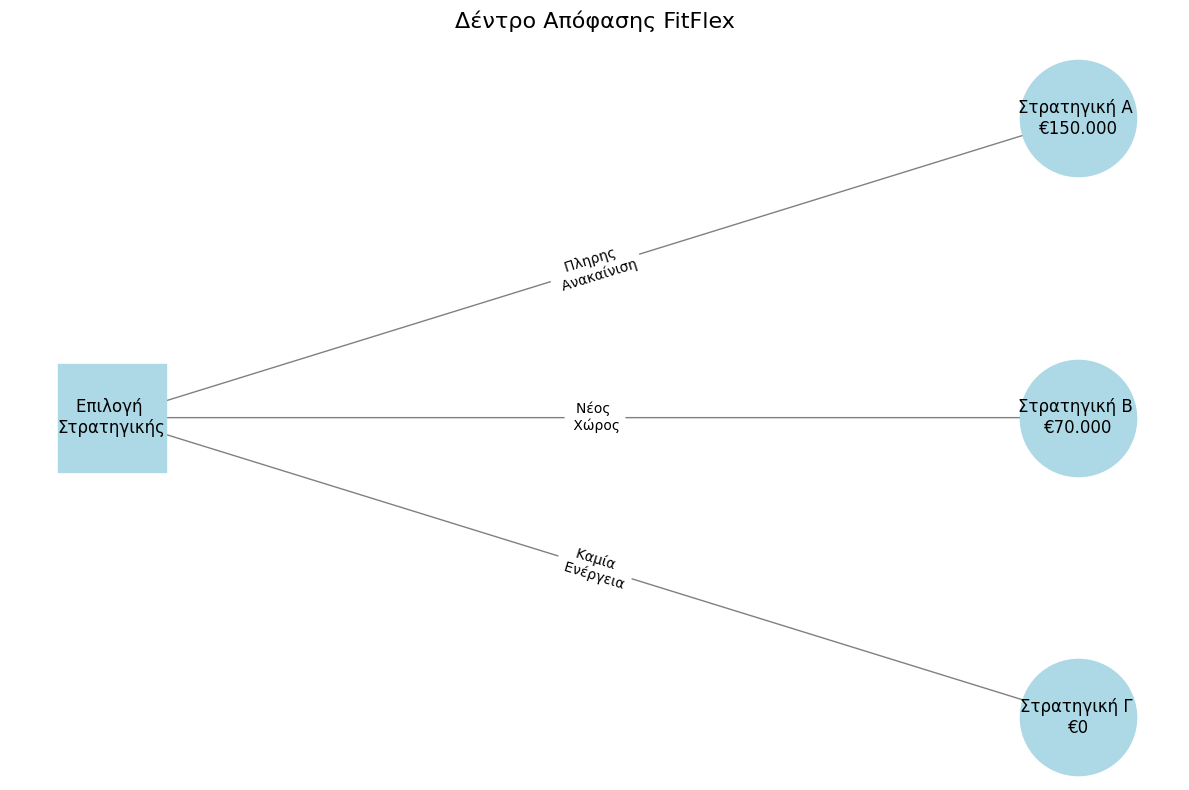

In [134]:
# Δημιουργία του δέντρου απόφασης
G = nx.DiGraph()

# Προσθήκη κόμβων
G.add_node("D1", pos=(0, 0), node_type="decision", label="Επιλογή \nΣτρατηγικής")
G.add_node("C1", pos=(2, 2), node_type="chance", label="Στρατηγική Α \n€150.000")
G.add_node("C2", pos=(2, 0), node_type="chance", label="Στρατηγική Β \n€70.000")
G.add_node("C3", pos=(2, -2), node_type="chance", label="Στρατηγική Γ \n€0")

# Προσθήκη ακμών
G.add_edge("D1", "C1", label="Πληρης \n Ανακαίνιση")
G.add_edge("D1", "C2", label="Νέος \n Χώρος")
G.add_edge("D1", "C3", label="Καμία \n Ενέργεια")

# Σχεδίαση του δέντρου
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(12, 8))

# Σχεδίαση των ακμών με ετικέτες
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Σχεδίαση των κόμβων
decision_nodes = [node for node, attr in G.nodes(data=True) if attr['node_type'] == 'decision']
chance_nodes = [node for node, attr in G.nodes(data=True) if attr['node_type'] == 'chance']

nx.draw_networkx_nodes(G, pos, nodelist=decision_nodes, 
                      node_color='lightblue',
                      node_shape='s',
                      node_size=6000)
nx.draw_networkx_nodes(G, pos, nodelist=chance_nodes, 
                      node_color='lightblue',
                      node_shape='o',
                      node_size=7000)

# Προσθήκη ετικετών στους κόμβους
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=labels)

plt.title("Δέντρο Απόφασης FitFlex", pad=20, size=16)
plt.axis('off')
plt.tight_layout()
plt.show()

## Υπολογισμός Expected Monetary Value (EMV)

Για κάθε στρατηγική, έχουμε τα εξής σενάρια ζήτησης και πιθανότητες:

### Στρατηγική Α: Πλήρης Ανακαίνιση (Κόστος €150.000)
- Υψηλή ζήτηση (30%): Κέρδος €300.000
- Μεσαία ζήτηση (50%): Κέρδος €200.000
- Χαμηλή ζήτηση (20%): Ζημία -€100.000 (λόγω του υψηλού αρχικού κόστους και χαμηλών εσόδων)

### Στρατηγική Β: Νέος Χώρος (Κόστος €70.000)
- Υψηλή ζήτηση (40%): Κέρδος €180.000
- Μεσαία ζήτηση (40%): Κέρδος €120.000
- Χαμηλή ζήτηση (20%): Ζημία -€30.000 (τα έσοδα δεν καλύπτουν το κόστος επένδυσης)

### Στρατηγική Γ: Καμία Ενέργεια (Κόστος €0)
- Υψηλή ζήτηση (20%): Κέρδος €80.000
- Μεσαία ζήτηση (50%): Κέρδος €60.000
- Χαμηλή ζήτηση (30%): Κέρδος €30.000 (δεν έχει ζημία γιατί δεν έχει επενδύσει)

In [135]:
# Ορισμός δεδομένων για κάθε στρατηγική
strategies = {
    'A': {
        'cost': 150000,
        'scenarios': {
            'high': {'prob': 0.30, 'revenue': 300000},
            'medium': {'prob': 0.50, 'revenue': 200000},
            'low': {'prob': 0.20, 'revenue': 50000}
        }
    },
    'B': {
        'cost': 70000,
        'scenarios': {
            'high': {'prob': 0.40, 'revenue': 180000},
            'medium': {'prob': 0.40, 'revenue': 120000},
            'low': {'prob': 0.20, 'revenue': 40000}
        }
    },
    'C': {
        'cost': 0,
        'scenarios': {
            'high': {'prob': 0.20, 'revenue': 80000},
            'medium': {'prob': 0.50, 'revenue': 60000},
            'low': {'prob': 0.30, 'revenue': 30000}
        }
    }
}

# Υπολογισμός EMV για κάθε στρατηγική
emv_results = {}
for strategy, data in strategies.items():
    # Υπολογισμός αναμενόμενου εσόδου
    expected_revenue = sum(
        scenario['prob'] * scenario['revenue']
        for scenario in data['scenarios'].values()
    )
    
    # Υπολογισμός καθαρού EMV (έσοδα - κόστος)
    emv = expected_revenue - data['cost']
    emv_results[strategy] = emv

# Εύρεση βέλτιστης στρατηγικής
best_strategy = max(emv_results.items(), key=lambda x: x[1])

# Εμφάνιση αποτελεσμάτων
print("Expected Monetary Value (EMV) για κάθε στρατηγική:")
print("-" * 50)
for strategy, emv in emv_results.items():
    print(f"Στρατηγική {strategy}: €{emv:,.2f}")
print("\nΒέλτιστη Στρατηγική:", f"{best_strategy[0]} με EMV: €{best_strategy[1]:,.2f}")

Expected Monetary Value (EMV) για κάθε στρατηγική:
--------------------------------------------------
Στρατηγική A: €50,000.00
Στρατηγική B: €58,000.00
Στρατηγική C: €55,000.00

Βέλτιστη Στρατηγική: B με EMV: €58,000.00


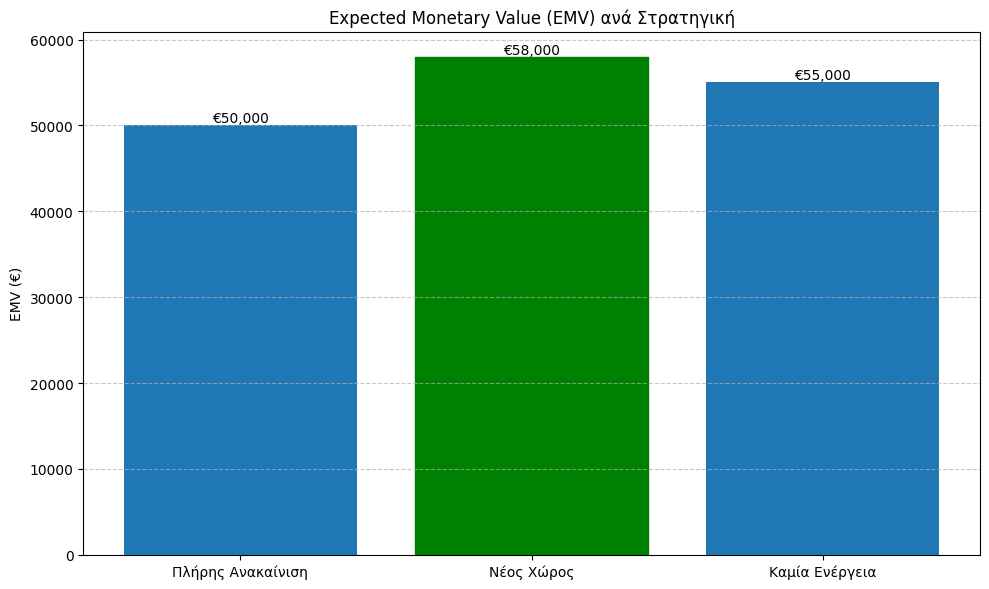

In [136]:
# Οπτικοποίηση των EMV
plt.figure(figsize=(10, 6))
strategies_names = ['Πλήρης Ανακαίνιση', 'Νέος Χώρος', 'Καμία Ενέργεια']
emv_values = list(emv_results.values())

bars = plt.bar(strategies_names, emv_values)

# Προσθήκη ετικετών στις μπάρες
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'€{height:,.0f}',
             ha='center', va='bottom')

plt.title('Expected Monetary Value (EMV) ανά Στρατηγική')
plt.ylabel('EMV (€)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Χρωματισμός της βέλτιστης στρατηγικής
best_index = list(emv_results.keys()).index(best_strategy[0])
bars[best_index].set_color('green')

plt.tight_layout()
plt.show()

## Συμπεράσματα EMV Ανάλυσης

Από την ανάλυση του Expected Monetary Value προκύπτει ότι:

1. Η Στρατηγική Α (Πλήρης Ανακαίνιση):
   - Κόστος επένδυσης: €150.000
   - Υψηλότερο δυνητικό κέρδος (έως €300.000)
   - Τελικό EMV: €50.000

2. Η Στρατηγική Β (Νέος Χώρος):
   - Κόστος επένδυσης: €70.000
   - Μεσαίο δυνητικό κέρδος (έως €180.000)
   - Τελικό EMV: €58.000

3. Η Στρατηγική Γ (Καμία Ενέργεια):
   - Κόστος επένδυσης: €0
   - Χαμηλότερο δυνητικό κέρδος (έως €80.000)
   - Τελικό EMV: €55.000

Η βέλτιστη επιλογή με βάση το EMV είναι η Στρατηγική Β (Νέος Χώρος) με EMV €58.000. Παρότι έχει μικρότερο μέγιστο κέρδος από τη Στρατηγική Α, το χαμηλότερο κόστος επένδυσης (€70.000 έναντι €150.000) οδηγεί σε καλύτερη συνολική απόδοση.

## Υπολογισμός Expected Value of Perfect Information (EVPI)

Το EVPI μας δείχνει πόσο αξίζει η τέλεια πληροφόρηση, δηλαδή πόσο θα ήμασταν διατεθειμένοι να πληρώσουμε για να γνωρίζουμε με βεβαιότητα τη ζήτηση πριν πάρουμε την απόφαση.

Για να το υπολογίσουμε:
1. Βρίσκουμε το μέγιστο κέρδος για κάθε σενάριο ζήτησης (υποθέτοντας ότι ξέραμε το σενάριο εκ των προτέρων)
2. Υπολογίζουμε το αναμενόμενο κέρδος με τέλεια πληροφόρηση
3. Αφαιρούμε το EMV της καλύτερης στρατηγικής χωρίς επιπλέον πληροφόρηση

EVPI = E[Μέγιστο κέρδος με τέλεια πληροφόρηση] - Μέγιστο EMV χωρίς πληροφόρηση

In [137]:
# Συγκέντρωση όλων των πιθανών σεναρίων
scenarios = ['high', 'medium', 'low']

# Υπολογισμός καθαρού κέρδους για κάθε συνδυασμό στρατηγικής-σεναρίου
profits = {
    scenario: {
        strategy: data['scenarios'][scenario]['revenue'] - data['cost']
        for strategy, data in strategies.items()
    }
    for scenario in scenarios
}

# Εύρεση της καλύτερης στρατηγικής για κάθε σενάριο
best_strategy_per_scenario = {
    scenario: max(profits[scenario].items(), key=lambda x: x[1])
    for scenario in scenarios
}

# Υπολογισμός αναμενόμενου κέρδους με τέλεια πληροφόρηση
expected_profit_perfect_info = sum(
    strategies[strategy]['scenarios'][scenario]['prob'] * profit
    for scenario, (strategy, profit) in best_strategy_per_scenario.items()
)

# Υπολογισμός EVPI
best_emv = max(emv_results.values())
evpi = expected_profit_perfect_info - best_emv

# Εμφάνιση αποτελεσμάτων
print("Ανάλυση Βέλτιστων Στρατηγικών ανά Σενάριο:")
print("-" * 50)
for scenario, (strategy, profit) in best_strategy_per_scenario.items():
    scenario_name = {
        'high': 'Υψηλή ζήτηση',
        'medium': 'Μεσαία ζήτηση',
        'low': 'Χαμηλή ζήτηση'
    }[scenario]
    print(f"{scenario_name}: Στρατηγική {strategy} με κέρδος €{profit:,.2f}")

print("\nΑποτελέσματα EVPI:")
print("-" * 50)
print(f"Αναμενόμενο κέρδος με τέλεια πληροφόρηση: €{expected_profit_perfect_info:,.2f}")
print(f"Καλύτερο EMV χωρίς πληροφόρηση: €{best_emv:,.2f}")
print(f"EVPI: €{evpi:,.2f}")

Ανάλυση Βέλτιστων Στρατηγικών ανά Σενάριο:
--------------------------------------------------
Υψηλή ζήτηση: Στρατηγική A με κέρδος €150,000.00
Μεσαία ζήτηση: Στρατηγική C με κέρδος €60,000.00
Χαμηλή ζήτηση: Στρατηγική C με κέρδος €30,000.00

Αποτελέσματα EVPI:
--------------------------------------------------
Αναμενόμενο κέρδος με τέλεια πληροφόρηση: €84,000.00
Καλύτερο EMV χωρίς πληροφόρηση: €58,000.00
EVPI: €26,000.00


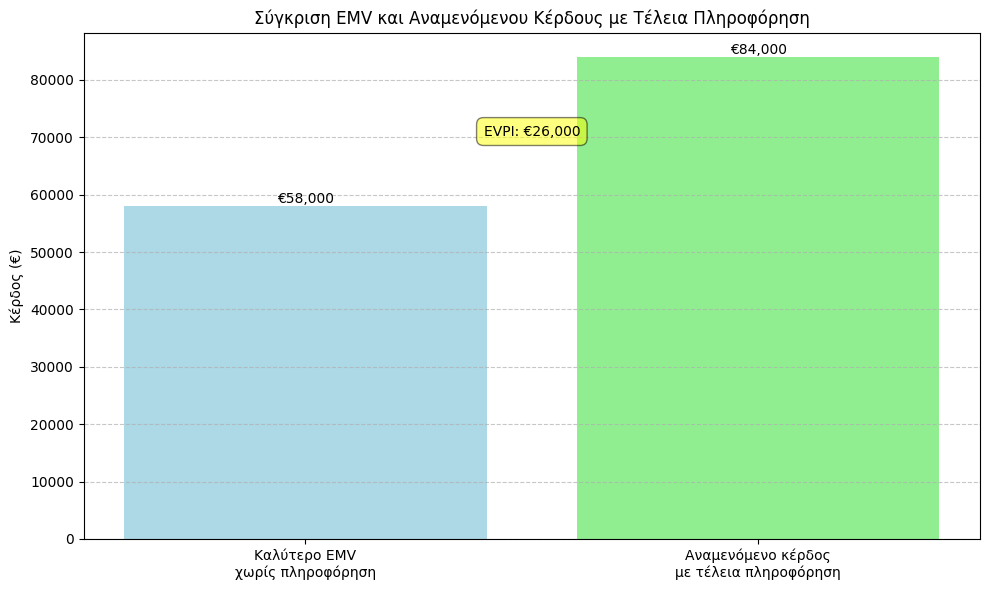

In [138]:
# Δημιουργία γραφήματος σύγκρισης
plt.figure(figsize=(10, 6))

# Δεδομένα για το γράφημα
values = [best_emv, expected_profit_perfect_info]
labels = ['Καλύτερο EMV\nχωρίς πληροφόρηση', 'Αναμενόμενο κέρδος\nμε τέλεια πληροφόρηση']

# Δημιουργία των μπαρών
bars = plt.bar(labels, values, color=['lightblue', 'lightgreen'])

# Προσθήκη ετικετών στις μπάρες
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'€{height:,.0f}',
             ha='center', va='bottom')

# Προσθήκη βέλους και κειμένου για το EVPI
plt.annotate(f'EVPI: €{evpi:,.0f}',
            xy=(0.5, min(values) + (max(values) - min(values))/2),
            xytext=(0.5, min(values) + (max(values) - min(values))/2),
            ha='center',
            va='center',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

plt.title('Σύγκριση EMV και Αναμενόμενου Κέρδους με Τέλεια Πληροφόρηση')
plt.ylabel('Κέρδος (€)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Συμπεράσματα EVPI Ανάλυσης

Από την ανάλυση του Expected Value of Perfect Information προκύπτει:

1. Η αξία της τέλειας πληροφόρησης (EVPI) είναι €26.000
2. Αυτό σημαίνει ότι θα ήταν λογικό να επενδύσουμε σε έρευνα αγοράς ή συμβουλευτικές υπηρεσίες που κοστίζουν λιγότερο από €26.000
3. Η διαφορά μεταξύ της καλύτερης στρατηγικής με πληροφόρηση (€84.000) και χωρίς πληροφόρηση (€58.000) δείχνει το μέγιστο όφελος που θα μπορούσαμε να έχουμε από την τέλεια γνώση της μελλοντικής ζήτησης

Αυτή η πληροφορία μας βοηθά να αποφασίσουμε αν αξίζει να επενδύσουμε σε περαιτέρω έρευνα πριν την τελική απόφαση.

## Ανάλυση Ευαισθησίας (Sensitivity Analysis)

Η ανάλυση ευαισθησίας μας δείχνει πώς αλλάζει η βέλτιστη απόφαση όταν μεταβάλλονται οι βασικές παράμετροι του προβλήματος. Θα εξετάσουμε:

1. Πώς επηρεάζεται το EMV κάθε στρατηγικής από αλλαγές στις πιθανότητες της υψηλής ζήτησης
2. Πώς επηρεάζεται η απόφαση από μεταβολές στα κόστη υλοποίησης
3. Σημεία καμπής (break-even points) όπου αλλάζει η βέλτιστη στρατηγική

Αυτή η ανάλυση μας βοηθά να κατανοήσουμε πόσο ευαίσθητη είναι η απόφασή μας σε πιθανά σφάλματα στις εκτιμήσεις μας.

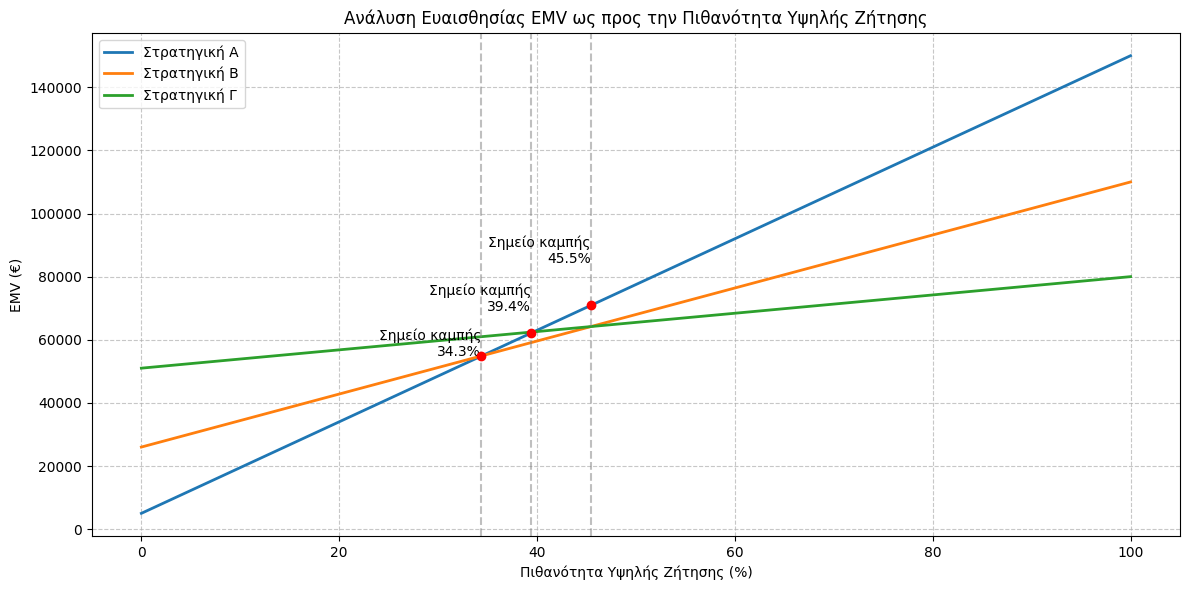

In [139]:
import numpy as np
import matplotlib.pyplot as plt

# Δημιουργία σημείων για την πιθανότητα υψηλής ζήτησης
prob_high = np.linspace(0, 1, 100)

# Υπολογισμός EMV για κάθε στρατηγική σε διαφορετικές πιθανότητες
emv_a = []
emv_b = []
emv_c = []

for p_high in prob_high:
    # Προσαρμογή των υπόλοιπων πιθανοτήτων αναλογικά
    p_medium = (1 - p_high) * 0.7  # 70% του υπόλοιπου
    p_low = (1 - p_high) * 0.3     # 30% του υπόλοιπου
    
    # Υπολογισμός EMV για κάθε στρατηγική
    emv_a.append(p_high * (300000 - 150000) + 
                p_medium * (200000 - 150000) + 
                p_low * (50000 - 150000))
    
    emv_b.append(p_high * (180000 - 70000) + 
                p_medium * (120000 - 70000) + 
                p_low * (40000 - 70000))
    
    emv_c.append(p_high * 80000 + 
                p_medium * 60000 + 
                p_low * 30000)

# Δημιουργία του γραφήματος
plt.figure(figsize=(12, 6))
plt.plot(prob_high * 100, emv_a, label='Στρατηγική A', linewidth=2)
plt.plot(prob_high * 100, emv_b, label='Στρατηγική B', linewidth=2)
plt.plot(prob_high * 100, emv_c, label='Στρατηγική Γ', linewidth=2)

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Πιθανότητα Υψηλής Ζήτησης (%)')
plt.ylabel('EMV (€)')
plt.title('Ανάλυση Ευαισθησίας EMV ως προς την Πιθανότητα Υψηλής Ζήτησης')
plt.legend()

# Εύρεση και επισήμανση σημείων τομής
intersection_points = []
for i in range(len(prob_high)-1):
    if (np.sign(emv_a[i] - emv_b[i]) != np.sign(emv_a[i+1] - emv_b[i+1]) or
        np.sign(emv_b[i] - emv_c[i]) != np.sign(emv_b[i+1] - emv_c[i+1]) or
        np.sign(emv_a[i] - emv_c[i]) != np.sign(emv_a[i+1] - emv_c[i+1])):
        
        intersection_points.append((prob_high[i] * 100, emv_a[i]))

# Σχεδίαση σημείων τομής με διαφορετικά ύψη για τις ετικέτες
for idx, (x, y) in enumerate(intersection_points):
    plt.scatter(x, y, color='red', zorder=5)
    plt.axvline(x=x, color='gray', linestyle='--', alpha=0.5)
    # Υπολογισμός διαφορετικού ύψους για κάθε ετικέτα
    label_y = min(emv_a[int(x/100*len(prob_high))], 
                 emv_b[int(x/100*len(prob_high))], 
                 emv_c[int(x/100*len(prob_high))]) + idx * 10000  # Μετατόπιση προς τα κάτω
    plt.text(x, label_y, f'Σημείο καμπής\n{x:.1f}%',
            horizontalalignment='right')

plt.tight_layout()
plt.show()

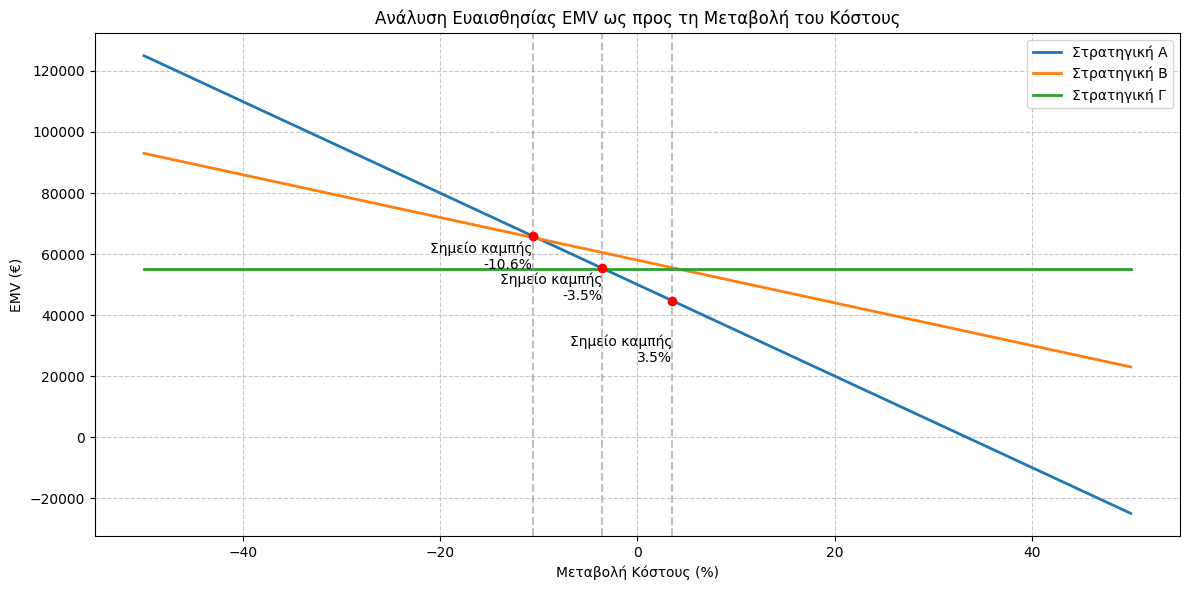

In [140]:
# Δημιουργία εύρους μεταβολής κόστους (-50% έως +50%)
cost_variation = np.linspace(-0.5, 0.5, 100)

# Υπολογισμός EMV για κάθε στρατηγική με διαφορετικά κόστη
base_cost_a = 150000
base_cost_b = 70000

emv_a_cost = []
emv_b_cost = []
emv_c_cost = []  # Στρατηγική Γ δεν έχει κόστος

for var in cost_variation:
    # Υπολογισμός νέων EMV με προσαρμοσμένα κόστη
    new_cost_a = base_cost_a * (1 + var)
    new_cost_b = base_cost_b * (1 + var)
    
    emv_a_cost.append(200000 - new_cost_a)  # Χρήση του αναμενόμενου εσόδου από πριν
    emv_b_cost.append(128000 - new_cost_b)
    emv_c_cost.append(55000)  # Σταθερό καθώς δεν έχει κόστος

# Δημιουργία του γραφήματος
plt.figure(figsize=(12, 6))
plt.plot(cost_variation * 100, emv_a_cost, label='Στρατηγική A', linewidth=2)
plt.plot(cost_variation * 100, emv_b_cost, label='Στρατηγική B', linewidth=2)
plt.plot(cost_variation * 100, emv_c_cost, label='Στρατηγική Γ', linewidth=2)

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Μεταβολή Κόστους (%)')
plt.ylabel('EMV (€)')
plt.title('Ανάλυση Ευαισθησίας EMV ως προς τη Μεταβολή του Κόστους')
plt.legend()

# Εύρεση και επισήμανση σημείων τομής
intersection_points = []
for i in range(len(cost_variation)-1):
    if (np.sign(emv_a_cost[i] - emv_b_cost[i]) != np.sign(emv_a_cost[i+1] - emv_b_cost[i+1]) or
        np.sign(emv_b_cost[i] - emv_c_cost[i]) != np.sign(emv_b_cost[i+1] - emv_c_cost[i+1]) or
        np.sign(emv_a_cost[i] - emv_c_cost[i]) != np.sign(emv_a_cost[i+1] - emv_c_cost[i+1])):
        
        intersection_points.append((cost_variation[i] * 100, emv_a_cost[i]))

# Σχεδίαση σημείων τομής με διαφορετικά ύψη για τις ετικέτες
for idx, (x, y) in enumerate(intersection_points):
    plt.scatter(x, y, color='red', zorder=5)
    plt.axvline(x=x, color='gray', linestyle='--', alpha=0.5)
    # Υπολογισμός διαφορετικού ύψους για κάθε ετικέτα
    label_y = min(emv_a_cost[int((x/100 + 0.5) * len(cost_variation))], 
                 emv_b_cost[int((x/100 + 0.5) * len(cost_variation))], 
                 emv_c_cost[int((x/100 + 0.5) * len(cost_variation))]) - idx * 10000  # Μετατόπιση προς τα κάτω
    plt.text(x, label_y, f'Σημείο καμπής\n{x:.1f}%',
            horizontalalignment='right')

plt.tight_layout()
plt.show()

## Συμπεράσματα Ανάλυσης Ευαισθησίας

Από την ανάλυση ευαισθησίας προκύπτουν τα εξής συμπεράσματα:

1. **Ευαισθησία στην Πιθανότητα Υψηλής Ζήτησης**:
   - Η Στρατηγική Α γίνεται πιο ελκυστική όσο αυξάνεται η πιθανότητα υψηλής ζήτησης
   - Η Στρατηγική Γ είναι πιο σταθερή στις μεταβολές των πιθανοτήτων
   - Υπάρχουν συγκεκριμένα σημεία καμπής όπου αλλάζει η βέλτιστη στρατηγική

2. **Ευαισθησία στο Κόστος**:
   - Η Στρατηγική Α είναι πιο ευαίσθητη σε μεταβολές κόστους λόγω του υψηλού αρχικού κόστους
   - Η Στρατηγική Γ παραμένει σταθερή καθώς δεν έχει κόστος
   - Υπάρχουν κρίσιμα σημεία όπου οι μεταβολές κόστους αλλάζουν τη βέλτιστη απόφαση

3. **Γενικά Συμπεράσματα**:
   - Η τρέχουσα βέλτιστη στρατηγική είναι η Στρατηγική Β με EMV €58.000 και παραμένει βέλτιστη για ένα εύρος μεταβολών
   - Χρειάζεται ιδιαίτερη προσοχή στις εκτιμήσεις κοντά στα σημεία καμπής
   - Η απόφαση είναι πιο ευαίσθητη στις μεταβολές του κόστους, ειδικά για τις Στρατηγικές Α και Β

## Ανάλυση Ατελούς Πληροφόρησης (Expected Value of Sample Information - EVSI)

Υποθέτουμε ότι μπορούμε να αγοράσουμε μια έρευνα αγοράς που προβλέπει αν η ζήτηση θα είναι "υψηλή" ή "όχι υψηλή". Η έρευνα δεν είναι τέλεια:
- Αν η πραγματική ζήτηση είναι υψηλή, η έρευνα το προβλέπει σωστά με πιθανότητα 80%
- Αν η πραγματική ζήτηση είναι μεσαία ή χαμηλή, η έρευνα το προβλέπει σωστά με πιθανότητα 70%

Θα υπολογίσουμε:
1. Την πιθανότητα να λάβουμε κάθε αποτέλεσμα από την έρευνα
2. Τις επικαιροποιημένες πιθανότητες (posterior) για κάθε σενάριο, δεδομένου του αποτελέσματος της έρευνας
3. Το EMV κάθε στρατηγικής με βάση τα νέα δεδομένα
4. Το συνολικό αναμενόμενο κέρδος με ατελή πληροφόρηση (EVSI)
5. Την αξία της πληροφόρησης (EVSI - EMV χωρίς πληροφόρηση)

In [141]:
# Αρχικές πιθανότητες
p_high = strategies['A']['scenarios']['high']['prob']
p_medium = strategies['A']['scenarios']['medium']['prob']
p_low = strategies['A']['scenarios']['low']['prob']

# Πιθανότητες πρόβλεψης της έρευνας
p_test_high_given_high = 0.8
p_test_not_high_given_high = 0.2
p_test_high_given_not_high = 0.3  # 1 - 0.7
p_test_not_high_given_not_high = 0.7

# Πιθανότητα να είναι πραγματικά "όχι υψηλή"
p_not_high = p_medium + p_low

# 1. Πιθανότητα να λάβουμε "υψηλή" ως αποτέλεσμα από την έρευνα
p_test_high = p_high * p_test_high_given_high + p_not_high * p_test_high_given_not_high
p_test_not_high = p_high * p_test_not_high_given_high + p_not_high * p_test_not_high_given_not_high

# 2. Posterior πιθανότητες για κάθε σενάριο, δεδομένου του αποτελέσματος της έρευνας
# Αν η έρευνα δείξει "υψηλή"
p_high_given_test_high = (p_high * p_test_high_given_high) / p_test_high
p_not_high_given_test_high = (p_not_high * p_test_high_given_not_high) / p_test_high

# Αν η έρευνα δείξει "όχι υψηλή"
p_high_given_test_not_high = (p_high * p_test_not_high_given_high) / p_test_not_high
p_not_high_given_test_not_high = (p_not_high * p_test_not_high_given_not_high) / p_test_not_high

# Κατανομή "όχι υψηλή" σε μεσαία και χαμηλή (με βάση τις αρχικές αναλογίες)
p_medium_given_not_high = p_medium / p_not_high
p_low_given_not_high = p_low / p_not_high

# 3. Υπολογισμός EMV για κάθε στρατηγική και κάθε αποτέλεσμα έρευνας
def emv_with_posteriors(p_high, p_medium, p_low):
    emvs = {}
    for strategy, data in strategies.items():
        emv = (p_high * data['scenarios']['high']['revenue'] +
               p_medium * data['scenarios']['medium']['revenue'] +
               p_low * data['scenarios']['low']['revenue'] -
               data['cost'])
        emvs[strategy] = emv
    return emvs

# Αν η έρευνα δείξει "υψηλή"
emvs_test_high = emv_with_posteriors(
    p_high_given_test_high,
    p_not_high_given_test_high * p_medium_given_not_high,
    p_not_high_given_test_high * p_low_given_not_high
)
best_emv_test_high = max(emvs_test_high.values())

# Αν η έρευνα δείξει "όχι υψηλή"
emvs_test_not_high = emv_with_posteriors(
    p_high_given_test_not_high,
    p_not_high_given_test_not_high * p_medium_given_not_high,
    p_not_high_given_test_not_high * p_low_given_not_high
)
best_emv_test_not_high = max(emvs_test_not_high.values())

# 4. Συνολικό αναμενόμενο κέρδος με ατελή πληροφόρηση (EVSI)
evsi = p_test_high * best_emv_test_high + p_test_not_high * best_emv_test_not_high

# 5. Αξία πληροφόρησης (EVSI - EMV χωρίς πληροφόρηση)
evsi_value = evsi - max(emv_results.values())

# Εμφάνιση αποτελεσμάτων
print("Αποτελέσματα EVSI (Ατελούς Πληροφόρησης):")
print("-" * 50)
print(f"Πιθανότητα να δείξει η έρευνα 'υψηλή': {p_test_high:.2f}")
print(f"Πιθανότητα να δείξει η έρευνα 'όχι υψηλή': {p_test_not_high:.2f}\n")

print("Posterior πιθανότητες αν η έρευνα δείξει 'υψηλή':")
print(f"Υψηλή: {p_high_given_test_high:.2f}, Μεσαία: {p_not_high_given_test_high * p_medium_given_not_high:.2f}, Χαμηλή: {p_not_high_given_test_high * p_low_given_not_high:.2f}")
print("Posterior πιθανότητες αν η έρευνα δείξει 'όχι υψηλή':")
print(f"Υψηλή: {p_high_given_test_not_high:.2f}, Μεσαία: {p_not_high_given_test_not_high * p_medium_given_not_high:.2f}, Χαμηλή: {p_not_high_given_test_not_high * p_low_given_not_high:.2f}\n")

print(f"Βέλτιστο EMV αν η έρευνα δείξει 'υψηλή': €{best_emv_test_high:,.2f}")
print(f"Βέλτιστο EMV αν η έρευνα δείξει 'όχι υψηλή': €{best_emv_test_not_high:,.2f}\n")

print(f"Συνολικό αναμενόμενο κέρδος με ατελή πληροφόρηση (EVSI): €{evsi:,.2f}")
print(f"Αξία πληροφόρησης (EVSI - EMV): €{evsi_value:,.2f}")

Αποτελέσματα EVSI (Ατελούς Πληροφόρησης):
--------------------------------------------------
Πιθανότητα να δείξει η έρευνα 'υψηλή': 0.45
Πιθανότητα να δείξει η έρευνα 'όχι υψηλή': 0.55

Posterior πιθανότητες αν η έρευνα δείξει 'υψηλή':
Υψηλή: 0.53, Μεσαία: 0.33, Χαμηλή: 0.13
Posterior πιθανότητες αν η έρευνα δείξει 'όχι υψηλή':
Υψηλή: 0.11, Μεσαία: 0.64, Χαμηλή: 0.25

Βέλτιστο EMV αν η έρευνα δείξει 'υψηλή': €83,333.33
Βέλτιστο EMV αν η έρευνα δείξει 'όχι υψηλή': €54,545.45

Συνολικό αναμενόμενο κέρδος με ατελή πληροφόρηση (EVSI): €67,500.00
Αξία πληροφόρησης (EVSI - EMV): €9,500.00


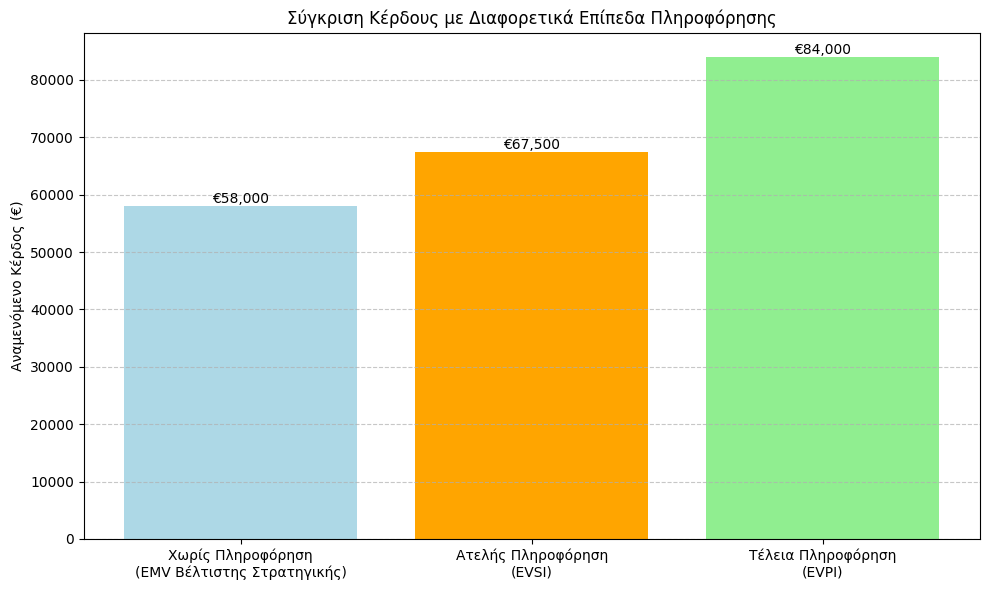

In [142]:
# Υπολογισμός EVPI αν δεν το έχεις ήδη
evpi_value = expected_profit_perfect_info - best_emv

# Δεδομένα για το γράφημα
labels = [
    'Χωρίς Πληροφόρηση\n(EMV Βέλτιστης Στρατηγικής)',
    'Ατελής Πληροφόρηση\n(EVSI)',
    'Τέλεια Πληροφόρηση\n(EVPI)'
]
values = [
    best_emv,
    evsi,
    expected_profit_perfect_info
]
colors = ['lightblue', 'orange', 'lightgreen']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=colors)

# Προσθήκη ετικετών στις μπάρες
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'€{height:,.0f}',
             ha='center', va='bottom')

plt.title('Σύγκριση Κέρδους με Διαφορετικά Επίπεδα Πληροφόρησης')
plt.ylabel('Αναμενόμενο Κέρδος (€)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Συμπεράσματα Ατελούς Πληροφόρησης (EVSI)

- Η αξία της ατελούς πληροφόρησης (EVSI) δείχνει το μέγιστο ποσό που αξίζει να πληρώσουμε για μια έρευνα αγοράς με τα συγκεκριμένα χαρακτηριστικά αξιοπιστίας.
- Αν το κόστος της έρευνας είναι μικρότερο από το EVSI, τότε συμφέρει να την αγοράσουμε.
- Η ανάλυση αυτή μας βοηθά να εκτιμήσουμε αν αξίζει να επενδύσουμε σε επιπλέον πληροφόρηση, ακόμα κι αν αυτή δεν είναι τέλεια.

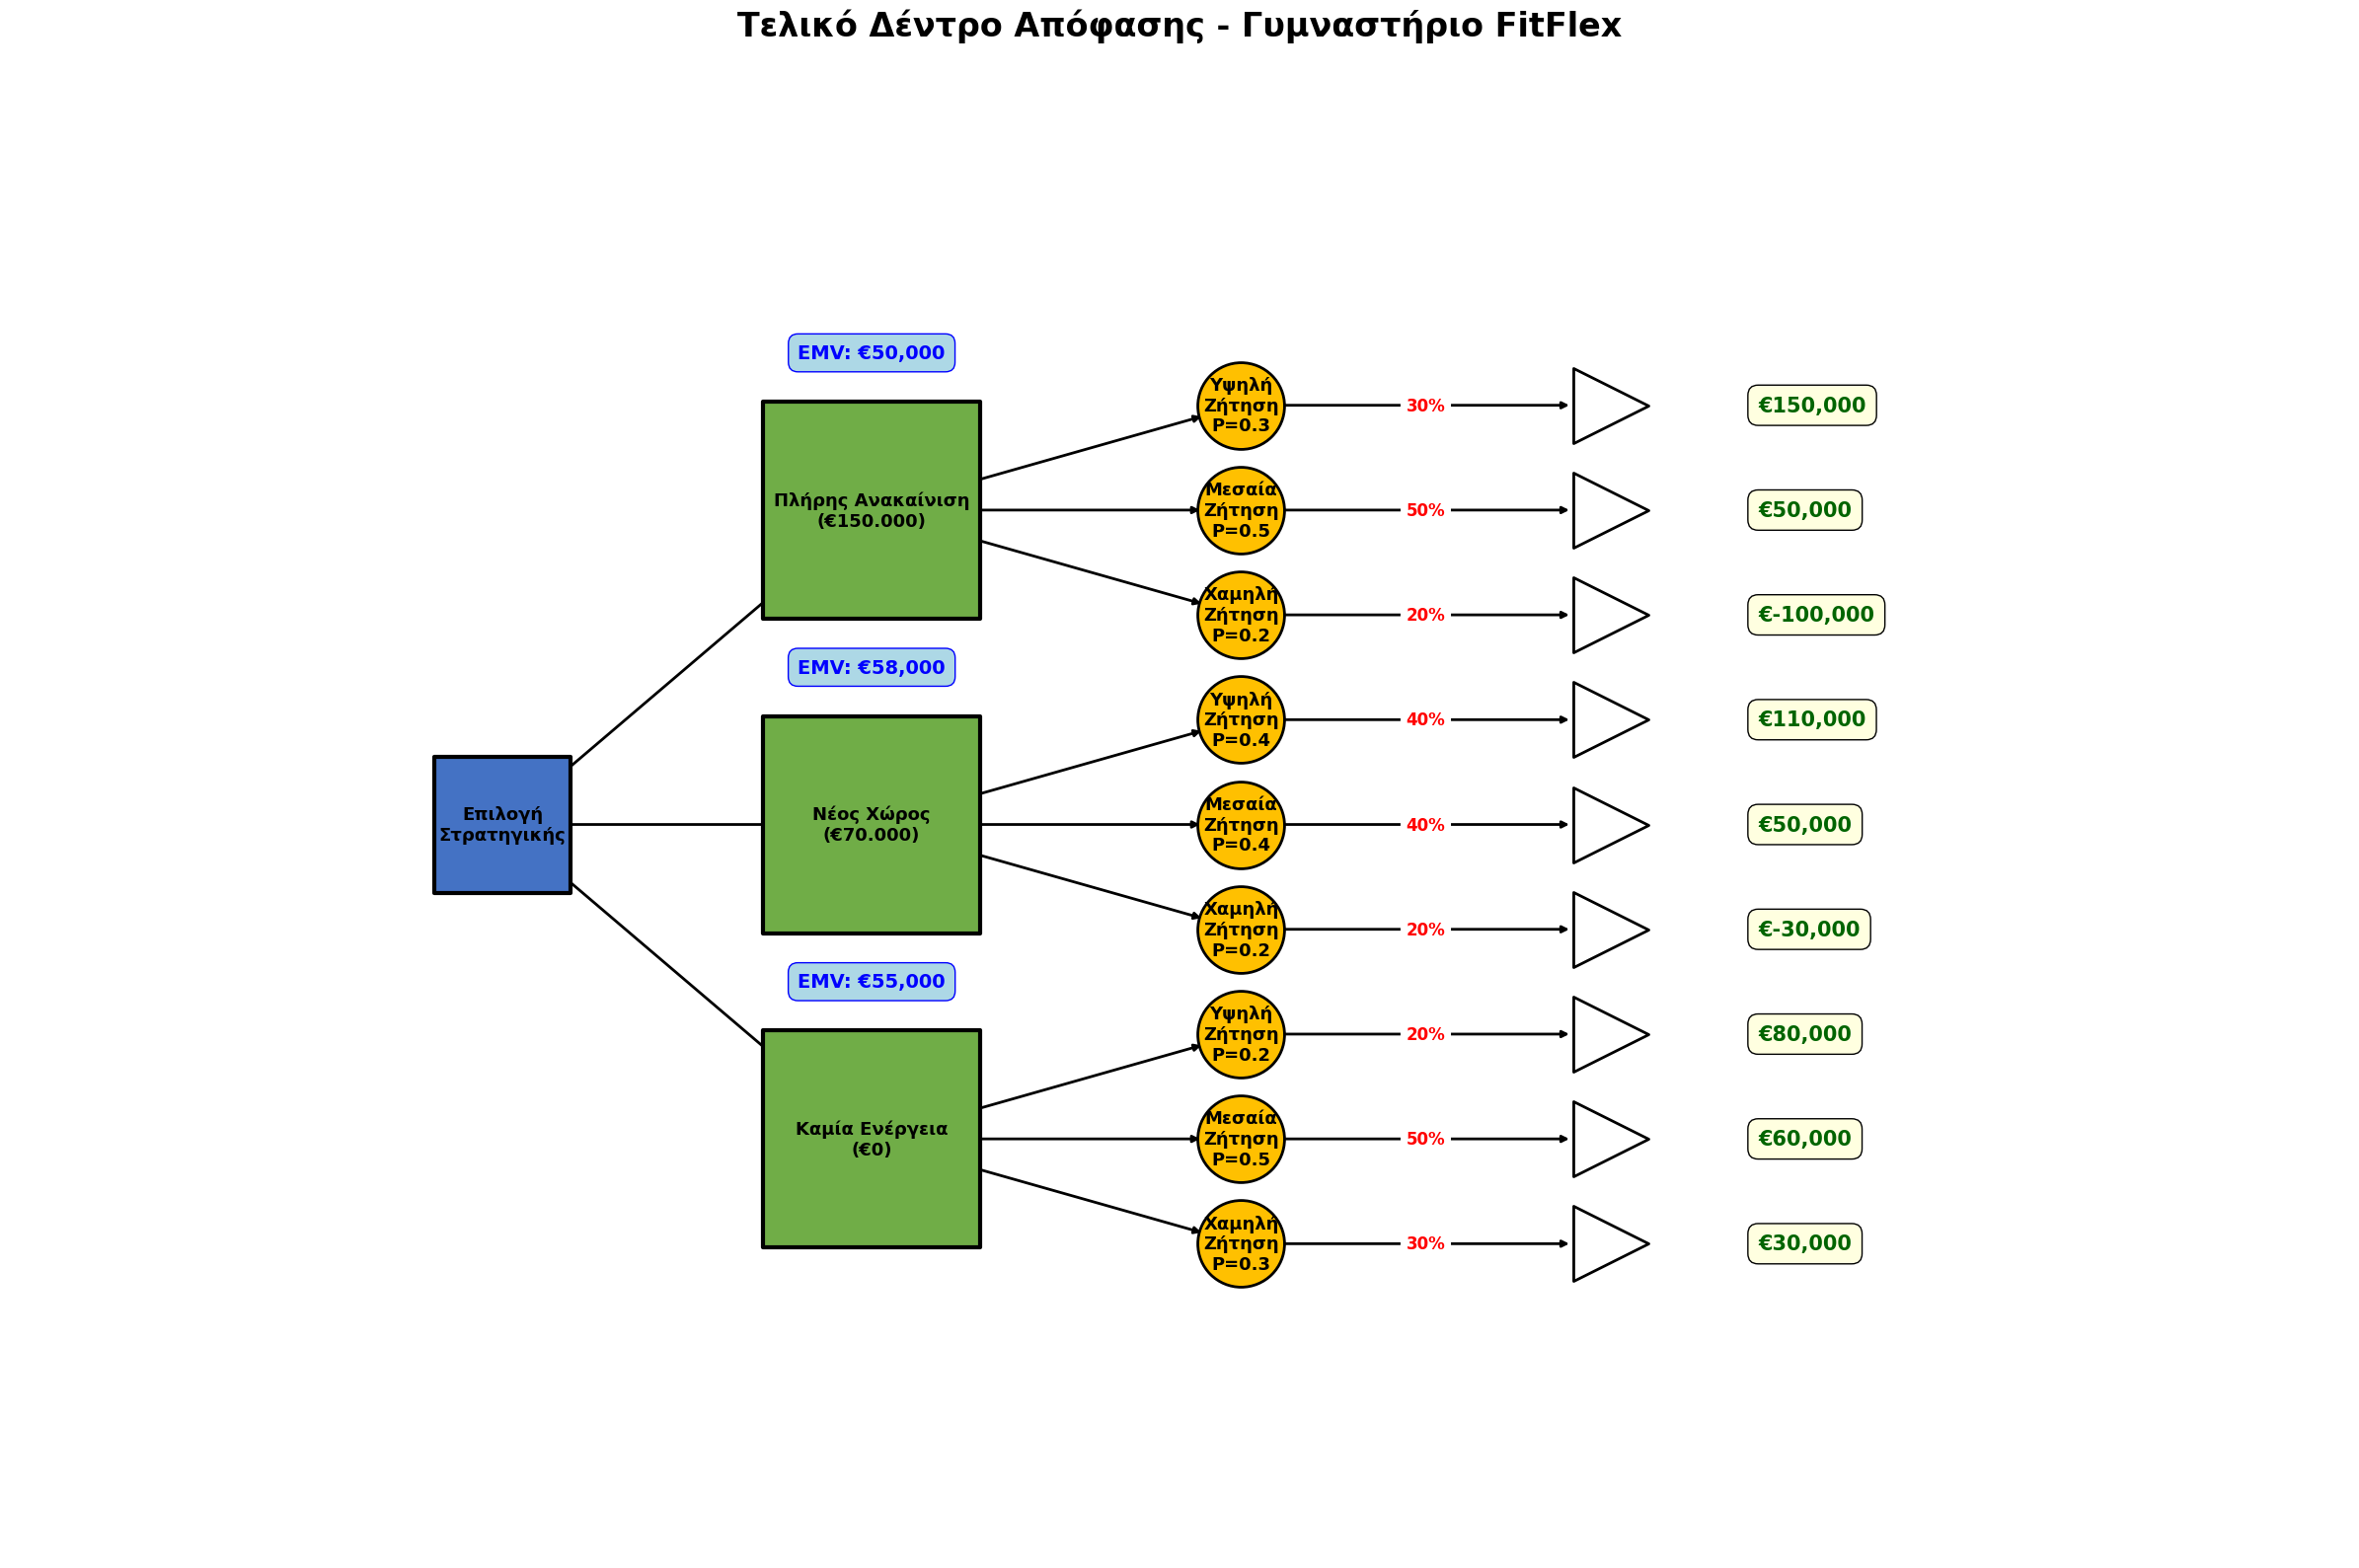

In [143]:
import matplotlib.pyplot as plt
import networkx as nx

# Δεδομένα (όπως πριν)
strategies_labels = {
    'A': 'Πλήρης Ανακαίνιση\n(€150.000)',
    'B': 'Νέος Χώρος\n(€70.000)',
    'C': 'Καμία Ενέργεια\n(€0)'
}
scenarios_labels = {
    'high': 'Υψηλή\nΖήτηση',
    'medium': 'Μεσαία\nΖήτηση',
    'low': 'Χαμηλή\nΖήτηση'
}
scenarios_probs = {
    'A': {'high': 0.3, 'medium': 0.5, 'low': 0.2},
    'B': {'high': 0.4, 'medium': 0.4, 'low': 0.2},
    'C': {'high': 0.2, 'medium': 0.5, 'low': 0.3}
}
scenarios_values = {
    'A': {'high': 300000, 'medium': 200000, 'low': 50000},
    'B': {'high': 180000, 'medium': 120000, 'low': 40000},
    'C': {'high': 80000, 'medium': 60000, 'low': 30000}
}
costs = {'A': 150000, 'B': 70000, 'C': 0}

# Δημιουργία γράφου
G = nx.DiGraph()

# Κόμβος απόφασης - στο κέντρο
G.add_node('D', label='Επιλογή\nΣτρατηγικής', pos=(0, 0))

# Κόμβοι στρατηγικών - με μεγαλύτερες αποστάσεις
strat_positions = {'A': (3, 3), 'B': (3, 0), 'C': (3, -3)}
for strat in ['A', 'B', 'C']:
    G.add_node(strat, label=strategies_labels[strat], pos=strat_positions[strat])
    G.add_edge('D', strat, label='')

# Κόμβοι τύχης - με ΠΟΛΥ καλύτερες αποστάσεις
chance_positions = {
    'A': {'high': (6, 4), 'medium': (6, 3), 'low': (6, 2)},
    'B': {'high': (6, 1), 'medium': (6, 0), 'low': (6, -1)},
    'C': {'high': (6, -2), 'medium': (6, -3), 'low': (6, -4)}
}

# Τελικοί κόμβοι payoff - ακόμα πιο δεξιά
payoff_positions = {
    'A': {'high': (9, 4), 'medium': (9, 3), 'low': (9, 2)},
    'B': {'high': (9, 1), 'medium': (9, 0), 'low': (9, -1)},
    'C': {'high': (9, -2), 'medium': (9, -3), 'low': (9, -4)}
}

for strat in ['A', 'B', 'C']:
    for scen in ['high', 'medium', 'low']:
        # Κόμβος τύχης
        chance_node = f'{strat}_{scen}'
        G.add_node(chance_node, label=f"{scenarios_labels[scen]}\nP={scenarios_probs[strat][scen]:.1f}", 
                  pos=chance_positions[strat][scen])
        G.add_edge(strat, chance_node, label='')
        
        # Payoff κόμβος
        payoff = scenarios_values[strat][scen] - costs[strat]
        payoff_node = f'{strat}_{scen}_payoff'
        G.add_node(payoff_node, label="", pos=payoff_positions[strat][scen])
        G.add_edge(chance_node, payoff_node, label=f"{scenarios_probs[strat][scen]*100:.0f}%")

# Σχεδίαση με ΕΠΑΓΓΕΛΜΑΤΙΚΟ στυλ
plt.figure(figsize=(24, 16))
pos = nx.get_node_attributes(G, 'pos')
labels = nx.get_node_attributes(G, 'label')

# ΕΔΩ ΟΡΙΖΟΝΤΑΙ ΤΑ ΜΕΓΕΘΗ ΤΩΝ ΚΟΜΒΩΝ:
# Κεντρικός κόμβος απόφασης - ΤΕΡΑΣΤΙΟΣ
nx.draw_networkx_nodes(G, pos, nodelist=['D'], node_shape='s', 
                      node_color='#4472C4', node_size=10000, edgecolors='black', linewidths=3)

# ΑΥΤΗ Η ΓΡΑΜΜΗ ΟΡΙΖΕΙ ΤΑ ΤΕΤΡΑΓΩΝΑ ΣΤΡΑΤΗΓΙΚΩΝ:
nx.draw_networkx_nodes(G, pos, nodelist=['A', 'B', 'C'], node_shape='s', 
                      node_color='#70AD47', node_size=25000, edgecolors='black', linewidths=3)

# Κόμβοι τύχης - ΜΕΓΑΛΟΙ κύκλοι
chance_nodes = [n for n in G.nodes if '_' in n and not n.endswith('payoff')]
nx.draw_networkx_nodes(G, pos, nodelist=chance_nodes, node_shape='o', 
                      node_color='#FFC000', node_size=4000, edgecolors='black', linewidths=2)

# Payoff κόμβοι - μεγαλύτερα τριγωνάκια
payoff_nodes = [n for n in G.nodes if n.endswith('payoff')]
nx.draw_networkx_nodes(G, pos, nodelist=payoff_nodes, node_shape='>', 
                      node_color='white', node_size=3000, edgecolors='black', linewidths=2)

# Ακμές με καλύτερο στυλ
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>', 
                      min_source_margin=30, min_target_margin=30, 
                      edge_color='black', width=2)

# Ετικέτες κόμβων με μεγαλύτερο font
labels_no_payoff = {k: v for k, v in labels.items() if not k.endswith('payoff')}
nx.draw_networkx_labels(G, pos, labels_no_payoff, font_size=13, font_weight='bold')

# Ετικέτες πιθανοτήτων στις ακμές
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, 
                            font_color='red', font_size=12, font_weight='bold')

# Payoffs δεξιά από τα τριγωνάκια - με στυλ!
for strat in ['A', 'B', 'C']:
    for scen in ['high', 'medium', 'low']:
        payoff = scenarios_values[strat][scen] - costs[strat]
        x, y = payoff_positions[strat][scen]
        plt.text(x + 1.2, y, f"€{payoff:,.0f}", va='center', ha='left', 
                fontsize=15, fontweight='bold', color='darkgreen',
                bbox=dict(boxstyle="round,pad=0.5", facecolor='lightyellow', edgecolor='black'))

# EMV values πάνω από κάθε στρατηγική
emv_values = {
    'A': 50000,  # Από τα αποτελέσματά σου
    'B': 58000,
    'C': 55000
}
for strat in ['A', 'B', 'C']:
    x, y = strat_positions[strat]
    plt.text(x, y + 1.5, f"EMV: €{emv_values[strat]:,.0f}", va='center', ha='center',
            fontsize=14, fontweight='bold', color='blue',
            bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue', edgecolor='blue'))

plt.title("Τελικό Δέντρο Απόφασης - Γυμναστήριο FitFlex", 
         fontsize=24, pad=40, fontweight='bold')
plt.axis('off')

# Περισσότερος χώρος γύρω από το γράφημα
plt.xlim(-4, 15)
plt.ylim(-7, 7)

plt.tight_layout()
plt.show()